In [80]:
# Initial imports
import os
import requests
import pandas as pd
import tradermade as tm
import hvplot.pandas
from pathlib import Path
from datetime import datetime
import talib
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
pn.extension()
%matplotlib inline



In [2]:
# set api key
tm.set_rest_api_key("CUA67dmfyikCZvVcLu_S")

In [3]:
#set time for today to get live data in time series
today = datetime.now().date


In [4]:
"""EUR/USD (Euro/US Dollar)
NZD/USD (New Zealand Dollar/US Dollar)
GBP/USD (British Pound/US Dollar)
USD/CAD (US Dollar/Canadian Dollar)
AUD/USD (Australian Dollar/US Dollar)"""
 
#get data
live_data = tm.live(currency='EURUSD,GBPUSD,NZDUSD,USDCAD,AUDUSD',fields=["bid", "mid", "ask"]) # returns live data - fields is optional
multiple_timeseries_data_1y = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2020-08-20", end = 'today', interval="daily",fields=["close"])
multiple_timeseries_data_1m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-07-19",end="today",interval="hourly",fields=["close"])         


# multiple_timeseries_data_6m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-02-19",end="2021-08-16",interval="daily",fields=["close"])
# multiple_timeseries_data_3m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-05-19",end="2021-08-16",interval="daily",fields=["close"])


In [128]:
# save to CSV file
#multiple_timeseries_data_1y.to_csv(path_or_buf = '../project1/1y_data.csv', index = False)
#multiple_timeseries_data_1m.to_csv(path_or_buf = '../project1/1m_data.csv', index = False)

# Set the path
file_path = Path('../project1/1y_data.csv')
path_file = Path('../project1/1m_data.csv')
one_year_csv_df = pd.read_csv(file_path,parse_dates=True)
one_month_csv_df = pd.read_csv(path_file,parse_dates=True)
# one_year_csv_df.head()
one_year_csv_df['date']=pd.to_datetime(one_year_csv_df['date'])
one_month_csv_df['date']=pd.to_datetime(one_month_csv_df['date'])



In [129]:
#slice the 1 year data to not do so many API calls

six_month_data_sliced = one_year_csv_df.iloc[-126:]                # set_index('date').loc['2021-02-19':'2021-08-16']
three_month_data_sliced = one_year_csv_df.iloc[-63:]               #set_index('date').loc['2021-05-19':'2021-08-16']
three_month_data_sliced.head(10)


,date,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
199,2021-05-26,1.21927,1.41223,0.72824,0.82471,0.77430
200,2021-05-27,1.21941,1.42016,0.72934,0.82871,0.77425
201,2021-05-28,1.21923,1.41904,0.72479,0.82820,0.77099
202,2021-05-31,1.22259,1.42095,0.72735,0.82919,0.77342
203,2021-06-01,1.22140,1.41497,0.72571,0.82846,0.77526
204,2021-06-02,1.22102,1.41717,0.72370,0.83089,0.77524
205,2021-06-03,1.21270,1.41061,0.71460,0.82581,0.76604
206,2021-06-04,1.21670,1.41559,0.72127,0.82777,0.77429
207,2021-06-07,1.21891,1.41762,0.72271,0.82764,0.77553
208,2021-06-08,1.21730,1.41513,0.71951,0.82559,0.77371


In [130]:
live_data.head()

,instrument,timestamp,bid,mid,ask
0,EURUSD,2021-08-25 08:30:55,1.17540,1.17541,1.17541
1,GBPUSD,2021-08-25 08:30:55,1.37399,1.37401,1.37403
2,NZDUSD,2021-08-25 08:30:55,0.69502,0.69503,0.69505
3,USDCAD,2021-08-25 08:30:55,1.26070,1.26071,1.26072
4,AUDUSD,2021-08-25 08:30:55,0.72553,0.72553,0.72553


In [131]:
#create dataframe with just AUDUSD
df_audusd = one_year_csv_df[["AUDUSD", "date"]].set_index('date')

In [223]:
#Create charts
"""NEED TO CLEAN UP CHARTS AND ADD LABELS"""

one_year_chart = one_year_csv_df.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='1 year daily data', legend='top', height=500, width=620, label = '1 Year Price Data - Daily').opts(shared_axes=False)
six_month_chart = six_month_data_sliced.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='6 month daily data', legend='top', height=500, width=620, label = '6 Month Price Data - Daily').opts(shared_axes=False)
three_month_chart = three_month_data_sliced.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='3 month daily data', legend='top', height=500, width=620, label = '3 Month Price Data - Daily').opts(shared_axes=False)
one_month_chart = one_month_csv_df.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='1 month hourly data', legend='top', height=500, width=620, label = 'One Month Hourly Price Data').opts(shared_axes=False)
live_chart = live_data.hvplot.bar(x = 'instrument', y = 'mid', label = 'Live Price Data')



live_chart

:Bars   [instrument]   (mid)

In [167]:
one_month_csv_df.dtypes

date      datetime64[ns]
EURUSD           float64
GBPUSD           float64
NZDUSD           float64
CADUSD           float64
AUDUSD           float64
dtype: object

In [168]:
# calculate daily returns of 1 year data
daily_returns = one_year_csv_df.set_index("date").pct_change().dropna()
daily_returns.head()

,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
date,,,,,
2020-08-21,-0.005354,-0.009407,0.000796,0.000818,-0.004449
2020-08-24,-0.000695,-0.002002,-0.002110,-0.003057,0.000237
2020-08-25,0.003902,0.006706,0.003218,0.003370,0.004594
2020-08-26,-0.000254,0.004464,0.011256,0.002094,0.005393
2020-08-27,-0.000786,-0.000643,0.002703,0.001275,0.003608


<AxesSubplot:xlabel='date'>

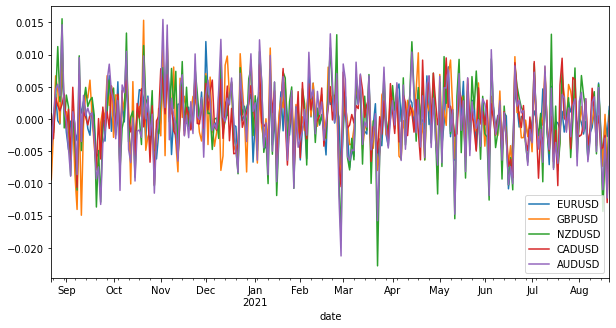

In [169]:
daily_returns.plot(figsize=(10,5)) #"""NEEDS LABELS"""

In [170]:
#Corelation between forex pairs
correlation = daily_returns.corr()
correlation

,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
EURUSD,1.000000,0.580408,0.655937,0.519070,0.703789
GBPUSD,0.580408,1.000000,0.640573,0.572231,0.696138
NZDUSD,0.655937,0.640573,1.000000,0.676372,0.895336
CADUSD,0.519070,0.572231,0.676372,1.000000,0.727283
AUDUSD,0.703789,0.696138,0.895336,0.727283,1.000000


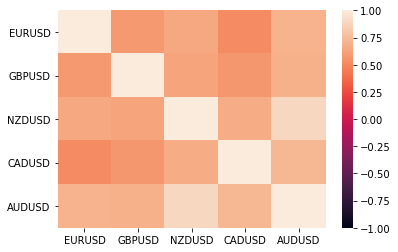

In [227]:
corr_heatmap = sns.heatmap(correlation, vmin=-1, vmax=1)# """NEEDS LABELS"""

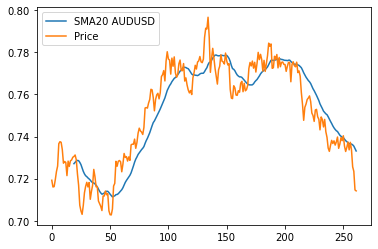

In [172]:
# Create 20 day Simple moving average plot to see short term trend
sma20_audusd = talib.SMA(df_audusd['AUDUSD'].values, 20)
sma20_plot = plt.plot(sma20_audusd, label = 'SMA20 AUDUSD')
sma20_plot = plt.plot(df_audusd['AUDUSD'].values,label = 'Price')
sma20_plot = plt.legend(loc="best")

In [262]:
#Create RSI data using TAlib and send to CSV so it can be convereted to dataframe
audusd_rsi = talib.RSI(df_audusd['AUDUSD'], timeperiod=14) 
audusd_rsi.to_csv(path_or_buf = '../project1/audusd_rsi.csv')

In [263]:
#Read RSI data from CSV
rsi_file_path = Path('../project1/audusd_rsi.csv', parse_dates=True)
df_audusd_rsi = pd.read_csv(rsi_file_path)
df_audusd_rsi.head()

,date,0
0,2020-08-20,NaN
1,2020-08-21,NaN
2,2020-08-24,NaN
3,2020-08-25,NaN
4,2020-08-26,NaN


In [264]:
# Clean RSI data
# Set Index to date
# df_audusd_rsi = df_audusd_rsi.set_index('date')

In [265]:
df_audusd_rsi.columns = ['date', 'RSI']

In [266]:
df_audusd_rsi = df_audusd_rsi.dropna()
df_audusd_rsi['date'] = pd.to_datetime(df_audusd_rsi['date'])
df_audusd_rsi.head()

,date,RSI
14,2020-09-09,59.210526
15,2020-09-10,56.127118
16,2020-09-11,58.587802
17,2020-09-14,58.977568
18,2020-09-15,60.178822


In [267]:
"""Creat bolinger band, potential trade signal"""
# upperband, middleband, lowerband = talib.BBANDS(df_audusd['AUDUSD'],timeperiod=5, nbdevup=1, nbdevdn=1, matype=0)
# plt.plot(df_audusd['AUDUSD'])
# plt.plot(upperband, label="upperband")
# plt.plot(middleband, label="middleband")
# plt.plot(lowerband, label="lowerband")
# plt.legend(loc='best')
# plt.figure(figsize=(100,50))

'Creat bolinger band, potential trade signal'

In [274]:
# concat RSI and AUDUSD dataframs
df_concat_rsi_audusd = pd.concat([df_audusd_rsi,df_audusd], axis = "columns", join= "inner")
# plot RSI chart
plot_rsi = df_audusd_rsi.hvplot.line(x = 'date', label = "RSI AUDUSD", height=200, width=700)
plot_audusd = df_audusd.hvplot.line(x = 'date', label = "AUDUSD One Year Price Data", height=400, width=700)
rsi_combined_plot = pn.Column("# RSI Chart ", plot_audusd, plot_rsi)
rsi_combined_plot

Column
    [0] Markdown(str)
    [1] HoloViews(Curve)
    [2] HoloViews(Curve)

In [231]:
# Create buy sell hold signal using RSI indicator

def RSI_Signal(RSI,hi=70,lo=30):
    if RSI>=hi:
        print('SELL')
    elif RSI<=lo:
        print('BUY')
    else:
        print('HOLD')
        
Todays_RSI = df_audusd_rsi.iloc[-1][0]

RSI_Signal(Todays_RSI)

BUY


In [239]:
plots_as_column = pn.Column(
    "# Currency Pair Charts", live_chart,one_month_chart, three_month_chart, six_month_chart, one_year_chart
)
tabs = pn.Tabs(
    ("Live data", live_chart),
    ("One month chart: Hourly data", one_month_chart),
    ("Three month chart: Daily data",one_year_chart),
    ('Six month chart: Daily data', six_month_chart),
    ("One year chart: Daily data", one_year_chart), 
    ("RSI", rsi_combined_plot) 
    
    
)
tabs

Tabs
    [0] HoloViews(Bars, name='Live data')
    [1] HoloViews(NdOverlay, name='one month chart: H...)
    [2] HoloViews(NdOverlay, name='Three month c...)
    [3] HoloViews(NdOverlay, name='Six month chart: D...)
    [4] HoloViews(NdOverlay, name='One year chart: D...)
    [5] HoloViews(Layout, name='RSI')

BUY


TextInput(name='What to do')